In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_f550ec5c0f454776ae28b0eda8494b97 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_f550ec5c0f454776ae28b0eda8494b97 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_f550ec5c0f454776ae28b0eda8494b97 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YBYBjiWLgM-V0TiM3EADA9dOOVB-W-kYZJdJ0WsrtIui',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_f550ec5c0f454776ae28b0eda8494b97)

body = client_f550ec5c0f454776ae28b0eda8494b97.get_object(Bucket='fooddemandforecasting-donotdelete-pr-dmmefp3lruuvtv',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train_data = pd.read_csv(body)
train_data.head()


id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [2]:

body = client_f550ec5c0f454776ae28b0eda8494b97.get_object(Bucket='fooddemandforecasting-donotdelete-pr-dmmefp3lruuvtv',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test_data = pd.read_csv(body)
test_data.head()


id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0

In [3]:

body = client_f550ec5c0f454776ae28b0eda8494b97.get_object(Bucket='fooddemandforecasting-donotdelete-pr-dmmefp3lruuvtv',Key='fulfilment_center_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [4]:

body = client_f550ec5c0f454776ae28b0eda8494b97.get_object(Bucket='fooddemandforecasting-donotdelete-pr-dmmefp3lruuvtv',Key='meal_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [5]:
train_data.shape

(456548, 9)

In [6]:
test_data.shape

(32573, 8)

In [7]:
df_data_1.shape

(77, 5)

In [8]:
df_data_2.shape

(51, 3)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [10]:
train_data['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [11]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [12]:
df_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [13]:
train_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [14]:
test_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [15]:
df_data_1.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [16]:
df_data_2.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [17]:
trainfinal=pd.merge(train_data, df_data_2, on="meal_id", how="outer")

In [18]:
trainfinal=pd.merge(trainfinal, df_data_1, on="center_id", how="outer")

In [19]:
trainfinal.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1018704     2         55     1885          135.83      152.29   
2  1196273     3         55     1885          132.92      133.92   
3  1116527     4         55     1885          135.86      134.86   
4  1343872     5         55     1885          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine  \
0                      0                  0         177  Beverages    Thai   
1                      0                  0         323  Beverages    Thai   
2                      0                  0          96  Beverages    Thai   
3                      0                  0         163  Beverages    Thai   
4                      0                  0         215  Beverages    Thai   

   city_code  region_code center_type  op_area  
0        647           56      TYPE_C      2.0  
1        647           56      TYPE_C      2.0  
2        647           56      TYPE_C      2.0  
3        647           56      TYPE_C      2.0  
4        647           56      TYPE_C      2.0

In [20]:
trainfinal=trainfinal.drop(['center_id','meal_id'], axis=1)

In [21]:
trainfinal.head()

id  week  checkout_price  base_price  emailer_for_promotion  \
0  1379560     1          136.83      152.29                      0   
1  1018704     2          135.83      152.29                      0   
2  1196273     3          132.92      133.92                      0   
3  1116527     4          135.86      134.86                      0   
4  1343872     5          146.50      147.50                      0   

   homepage_featured  num_orders   category cuisine  city_code  region_code  \
0                  0         177  Beverages    Thai        647           56   
1                  0         323  Beverages    Thai        647           56   
2                  0          96  Beverages    Thai        647           56   
3                  0         163  Beverages    Thai        647           56   
4                  0         215  Beverages    Thai        647           56   

  center_type  op_area  
0      TYPE_C      2.0  
1      TYPE_C      2.0  
2      TYPE_C      2.0  
3      TYPE_C      2.0  
4      TYPE_C      2.0

In [22]:
cols=trainfinal.columns.tolist()

In [23]:
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [24]:
cols= cols[:2]+ cols[9:] + cols[7:9] + cols[2:7]

In [25]:
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [26]:
trainfinal=trainfinal[cols]

In [27]:
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
lb1=LabelEncoder()
trainfinal['center_type']=lb1.fit_transform(trainfinal['center_type'])

lb2=LabelEncoder()
trainfinal['category']=lb1.fit_transform(trainfinal['category'])

lb3=LabelEncoder()
trainfinal['cuisine']=lb1.fit_transform(trainfinal['cuisine'])



In [29]:
trainfinal.head()

id  week  city_code  region_code  center_type  op_area  category  \
0  1379560     1        647           56            2      2.0         0   
1  1018704     2        647           56            2      2.0         0   
2  1196273     3        647           56            2      2.0         0   
3  1116527     4        647           56            2      2.0         0   
4  1343872     5        647           56            2      2.0         0   

   cuisine  checkout_price  base_price  emailer_for_promotion  \
0        3          136.83      152.29                      0   
1        3          135.83      152.29                      0   
2        3          132.92      133.92                      0   
3        3          135.86      134.86                      0   
4        3          146.50      147.50                      0   

   homepage_featured  num_orders  
0                  0         177  
1                  0         323  
2                  0          96  
3                  0         163  
4                  0         215

In [30]:
trainfinal.shape

(456548, 13)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'num_orders distribution')

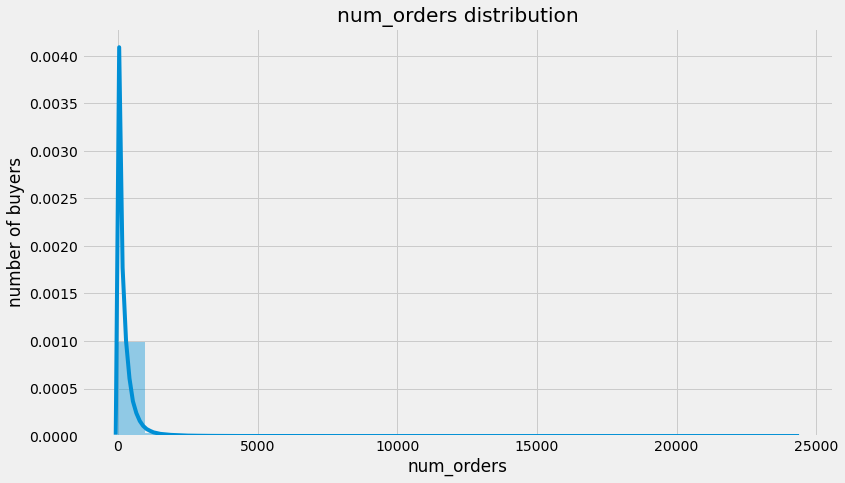

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders, bins=25)
plt.xlabel("num_orders")
plt.ylabel("number of buyers")
plt.title("num_orders distribution")

In [32]:
trainfinal2=trainfinal.drop(['id'], axis=1)
correlation=trainfinal.corr(method='pearson')
columns=correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

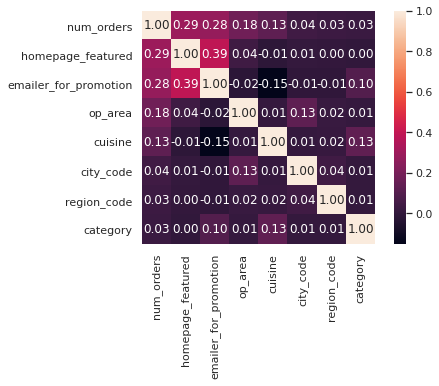

In [33]:
import numpy as np

correlation_map=np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap= sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [34]:
features=columns.drop(['num_orders'])
trainfinal3=trainfinal[features]
x= trainfinal3.values
y= trainfinal['num_orders'].values

In [35]:
trainfinal3.head()

homepage_featured  emailer_for_promotion  op_area  cuisine  city_code  \
0                  0                      0      2.0        3        647   
1                  0                      0      2.0        3        647   
2                  0                      0      2.0        3        647   
3                  0                      0      2.0        3        647   
4                  0                      0      2.0        3        647   

   region_code  category  
0           56         0  
1           56         0  
2           56         0  
3           56         0  
4           56         0

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [38]:
XG= XGBRegressor()
XG.fit(x_train, y_train)
y_pred= XG.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))


RMSLE: 69.5175346146897


In [39]:
LR= LinearRegression()
LR.fit(x_train, y_train)
y_pred= LR.predict(x_val)
y_pred[y_pred<0]= 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.48022472541743


In [40]:
L= Lasso()
L.fit(x_train, y_train)
y_pred= L.predict(x_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.02725637391234


In [41]:
EN= ElasticNet()
EN.fit(x_train, y_train)
y_pred = EN.predict(x_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 130.76331192465943


In [42]:
DT= DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred= DT.predict(x_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.69702261133139


In [43]:
KNN= KNeighborsRegressor()
KNN.fit(x_train, y_train)
y_pred= KNN.predict(x_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 67.19760965560346


In [44]:
GB= GradientBoostingRegressor()
GB.fit(x_train, y_train)
y_pred = GB.predict(x_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 100.37605002694634


In [45]:
import pickle
pickle.dump(DT, open('fdemand.pkl','wb'))

In [46]:
testfinal = pd.merge(test_data, df_data_2, on="meal_id", how="outer")
testfinal = pd.merge(testfinal, df_data_1, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)

tcols=testfinal.columns.tolist()
tcols= tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]

lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])

lb2 = LabelEncoder()
testfinal['category'] = lb1.fit_transform(testfinal['category'])

lb3 = LabelEncoder()
testfinal['cuisine'] = lb1.fit_transform(testfinal['cuisine'])

x_test = testfinal[features].values



In [47]:
pred = DT.predict(x_test)
pred[pred<0] = 0
submit = pd.DataFrame({'id': testfinal['id'], 'num_orders' : pred})


In [48]:
submit.to_csv("submission.csv", index=False)

In [49]:
submit.describe()

id    num_orders
count  3.257300e+04  32573.000000
mean   1.248476e+06    262.629225
std    1.441580e+05    362.137450
min    1.000085e+06     15.226415
25%    1.123969e+06     64.250896
50%    1.247296e+06    147.796296
75%    1.372971e+06    321.171004
max    1.499996e+06   5295.777778

In [50]:
!pip install ibm_watson_machine_learning

In [51]:
from ibm_watson_machine_learning import APIClient
wml_credentials= {
                    "url":"https://eu-gb.ml.cloud.ibm.com",
                    "apikey":"qyNC12c3YyY0bhfyfYq0VVErI3i_iTxexfk059pJOhrq"
    
                }
client = APIClient(wml_credentials)
print(client.version)

1.0.173


In [52]:
def guid_from_space_name(client, space_name):
    instance_details = client.service_instance.get_details()
    space= client.spaces.get_details()
    #print(space)
    retunr(next(item for item in space['resources'] if item['entity']["name"] == space_name) ['metadata']['id'])

In [53]:
space_uid= '2266e287-4247-4ec4-b85f-01580d82271e'
print("Space UID="  + space_uid)
                                


Space UID=2266e287-4247-4ec4-b85f-01580d82271e


In [54]:
client.set.default_space(space_uid)

'SUCCESS'

In [55]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [60]:
software_spec_uid= client.software_specifications.get_uid_by_name("default_py3.6")
software_spec_uid

'0062b8c9-8b7d-44a0-a9b9-46c416adcbd9'

In [72]:
model_details= client.repository.store_model(model= XG , meta_props={
 client.repository.ModelMetaNames.NAME: "food_demand_deployment",
 client.repository.ModelMetaNames.TYPE: "scikit-learn_0.20",
 client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid}
                                            )
                                            
model_id= client.repository.get_model_uid(model_details)

Traceback (most recent call last):
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 254, in _save_scikit_pipeline_model
    model_artifact = self._create_pipeline_model(artifact, query_param)
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 514, in _create_pipeline_model
    model_artifact = self._create_pipeline_model_v4_cloud(model_artifact, query_param)
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 1152, in _create_pipeline_model_v4_cloud
    model_output = self.repository_api.ml_assets_model_creation_v4_cloud(model_input, query_param,headers)
  File "/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/ibm_watson_machine_learning/libs/repo/swagger_client/apis/repositor

WMLClientError: Publishing model failed.
Reason: (401)
Reason: Unauthorized
HTTP response headers: HTTPHeaderDict({'Date': 'Fri, 03 Dec 2021 00:46:06 GMT', 'Content-Type': 'text/plain; charset=UTF-8', 'Content-Length': '274', 'Connection': 'keep-alive', 'server-timing': 'intid;desc=2fc892a51d721024, intid;desc=2fc892a51d721024', 'WWW-Authenticate': 'Bearer realm="IAM"', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '6b78c6a95c6e5ba4-FRA'})
HTTP response body: {
  "trace": "35e418bafdc951ac93c5662c07ba49e7",
  "errors": [{
    "code": "authorization_rejected",
    "message": "The token is expired since 2021-12-03T00:26:46Z",
    "target": {
      "type": "header",
      "name": "Authorization"
    }
  }],
  "status_code": "401"
}


In [64]:
model_id = '106a483f-dddb-4b8c-907e-3197c1d42d16'

In [71]:
model_id

'106a483f-dddb-4b8c-907e-3197c1d42d16'

In [65]:
x_train[0]

array([  0. ,   0. ,   4.4,   2. , 553. ,  77. ,   0. ])

In [73]:
DT.predict([[ 0. ,   0. ,   4.4,   2. , 553. ,  77. ,   0.]])

array([319.4789644])

In [2]:
x_train[0]

NameError: name 'x_train' is not defined